# Goal: Predict Survivors on the Titanic

In [1]:
#EDA
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

plt.style.use('seaborn')
sns.set_palette('colorblind')

#Python
import math, time, datetime, random

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression, LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

# Model Evaluation from Scikit_learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

%matplotlib inline

In [154]:
#Import data

original_train = pd.read_csv('Data/train.csv')
originial_test = pd.read_csv('Data/test.csv')

train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')
submission = pd.read_csv('Data/gender_submission.csv')

## EDA

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Dictionary

![](data_dict_titanic.png)

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Data Types

In [5]:
train.info()
print('--'*20)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

## Missing Values

819 entries for train, around half (418) for test.

A lot of missing values in Cabin and also some in Age. 

    2 in Embarked for train. 
    1 in Fare for test. 


In [6]:
print(train.isna().sum())
print('--'*10)
print(test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


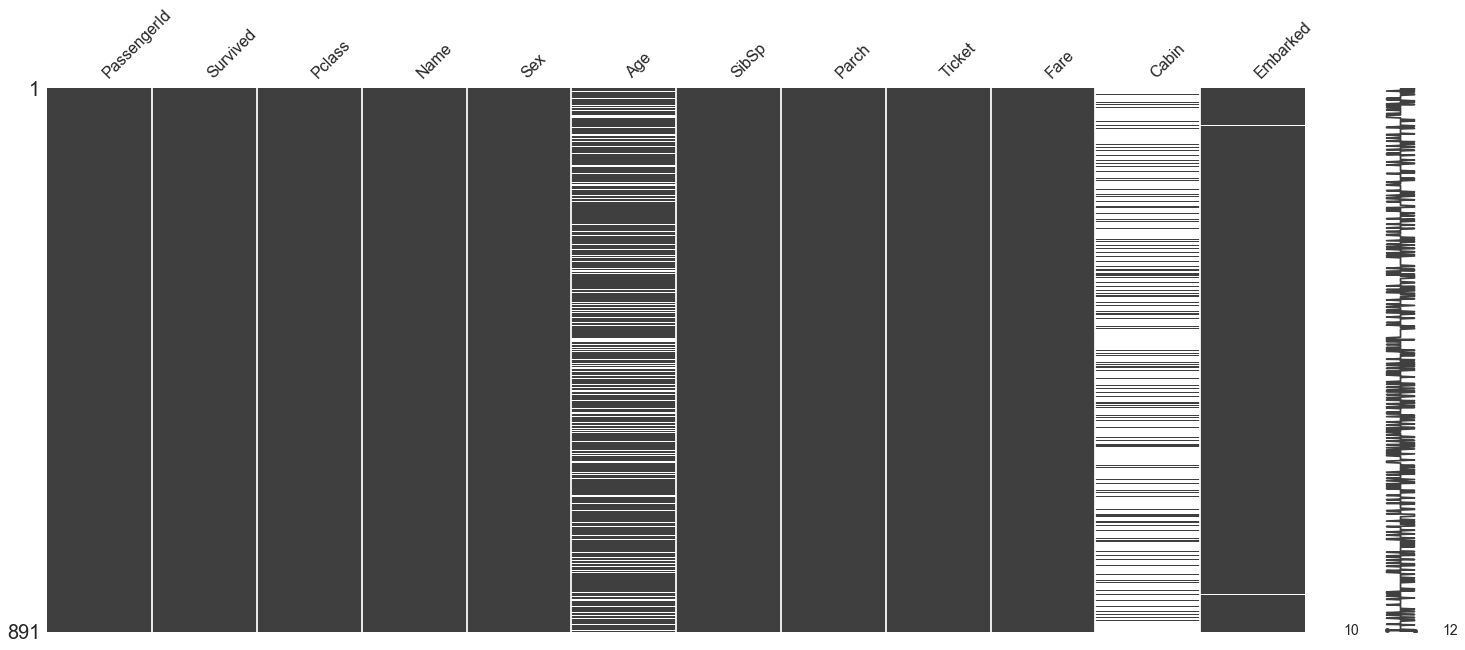

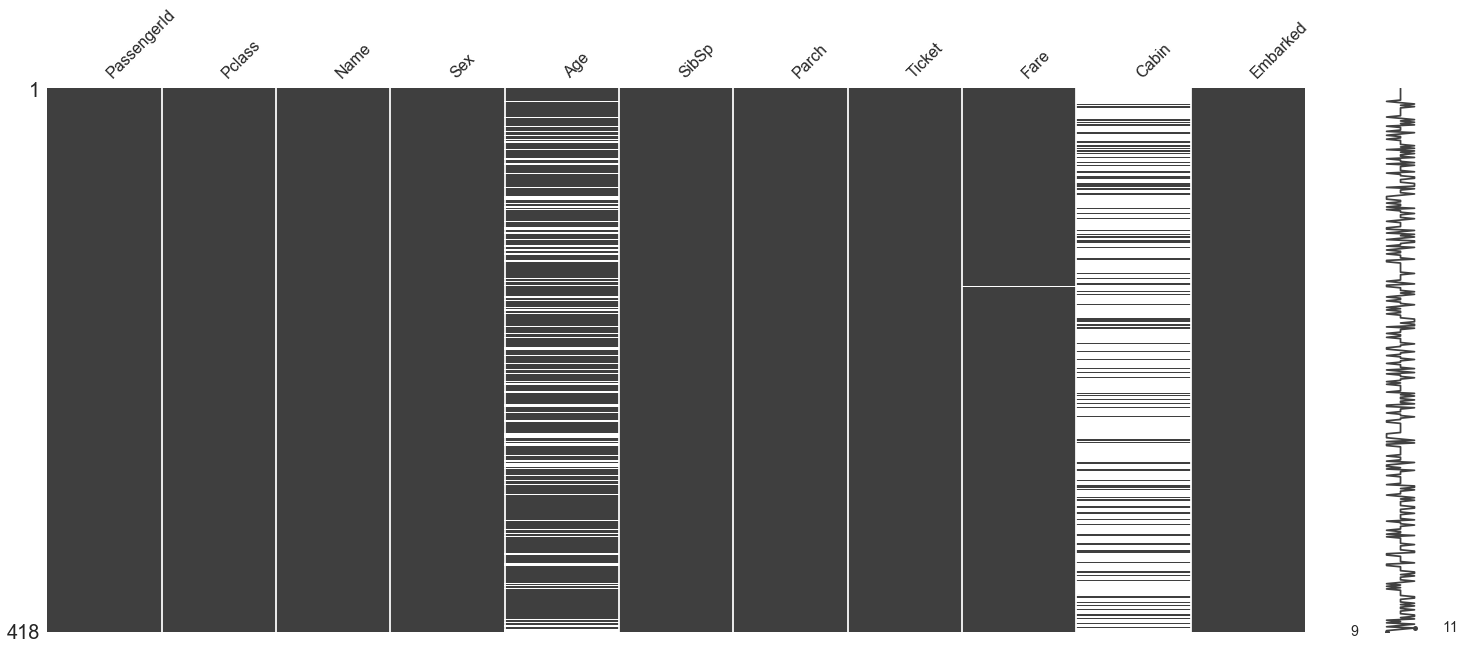

In [7]:
missingno.matrix(train), missingno.matrix(test); 

## Percentage that Survived

0    549
1    342
Name: Survived, dtype: int64

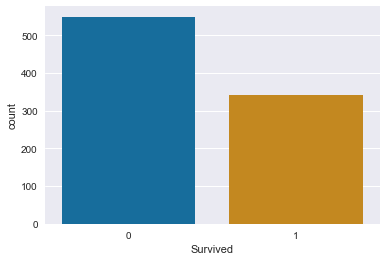

In [8]:
sns.countplot(x='Survived', data = train)
train.Survived.value_counts()

In [9]:
print('Percentage of people survived: '+ str(round(342/891, 2)) + '%')

Percentage of people survived: 0.38%


## Types of Features

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Categorical Features:**
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: **Sex, Embarked.**

**Ordinal Features:**
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For example: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.

Ordinal Features in the dataset: **PClass, SibSp, Parch**

**Continous Feature:**
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset: **Age, Fare**

## Analyzing the Features

### Sex

In [11]:
train.groupby(['Sex'])['Survived'].count() # Group by Sex, then count Survived

Sex
female    314
male      577
Name: Survived, dtype: int64

In [12]:
train.groupby(['Sex', 'Survived'])['Survived'].count() # Group by Sex AND Survived, then count Survived

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

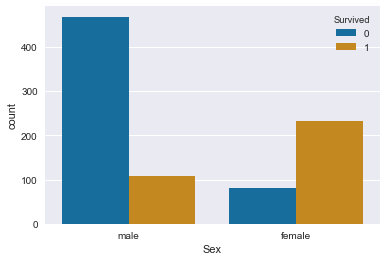

In [13]:
sns.countplot(x='Sex', hue='Survived', data=train);

In [14]:
p_f_survived = round(233/314 *100, 2)
p_m_survived = round(109/577 *100, 2)

print(f'Of the females {p_f_survived} % survived, whereas {p_m_survived} % of males survived.')

Of the females 74.2 % survived, whereas 18.89 % of males survived.


### Pclass

3    491
1    216
2    184
Name: Pclass, dtype: int64

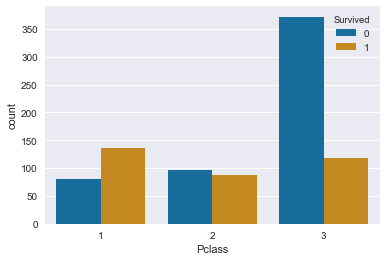

In [15]:
sns.countplot(x='Pclass', hue= 'Survived', data=train)
train.Pclass.value_counts()

* 1st class: best chance of surviving 
* 2nd class: roughly 50% chance of surviving 
* 3rd class: low chance of survival

In [16]:
pd.crosstab(train.Pclass, train.Survived, margins = True) # Another way of showcasing this numerically

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


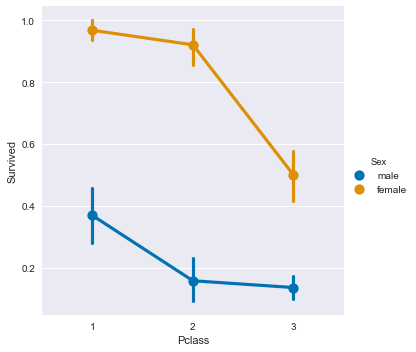

In [17]:
sns.catplot('Pclass', 'Survived', hue= 'Sex', data = train, kind = 'point'); 

# Can use sns.catplot with kind = 'point' to analyze categorical variables.
# Now it's easy to see females in class 1 and 2 are very likely to survive

### Age

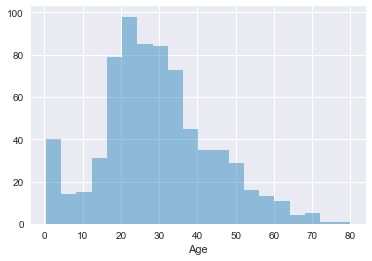

In [18]:
sns.distplot(train.Age, kde=False)

In [19]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

People are between .4 and 80 years old with an average of 30 and a stdv of 15. 

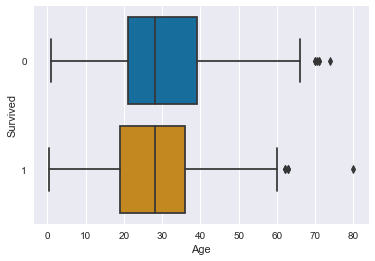

In [20]:
sns.boxplot(x='Age', y='Survived', orient= 'h', data=train)

In [21]:
age_died = train[train['Survived'] == 0]['Age'].describe()
age_surv = train[train['Survived'] == 1]['Age'].describe()

In [22]:
print(age_died)
print('--'*20)
print(age_surv)

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64
----------------------------------------
count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64


**Remember there are 177 missing values in Age**

How to fill these?

Could use mean, but as can be seen inthe boxplot, age range is varying widely.

It seems possible to pick a mean age per initial. 

In [23]:
train.Name.head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [24]:
train['Initial'] = 0
for i in train:
    train['Initial']=train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [25]:
train.Initial.head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Initial, dtype: object

In [26]:
train.Initial.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Sir           1
Countess      1
Capt          1
Ms            1
Jonkheer      1
Lady          1
Don           1
Mme           1
Name: Initial, dtype: int64

In [27]:
list(train.Initial.unique())

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [28]:
train['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle',
                          'Col', 'Capt', 'Countess', 'Jonkheer'],
                         ['Mr', 'Mrs', 'Miss', 'Master', 'Mr', 'Mr', 'Mr', 'Other', 'Other', 
                          'Mr', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other'], 
                         inplace = True)

In [29]:
train.groupby(['Initial'])['Age'].mean()

Initial
Master     4.574167
Miss      21.773973
Mr        32.761501
Mrs       35.898148
Other     41.272727
Name: Age, dtype: float64

In [30]:
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age']=46

In [31]:
train.Age.isna().sum() # Filled all the age rows

0

### Embarked

S    644
C    168
Q     77
Name: Embarked, dtype: int64

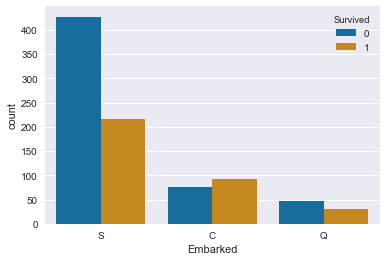

In [32]:
sns.countplot(x='Embarked', hue='Survived', data=train)
train.Embarked.value_counts()

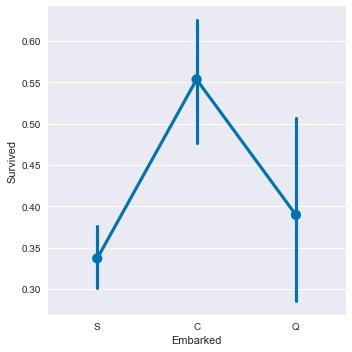

In [33]:
sns.catplot('Embarked', 'Survived', data=train, kind = 'point')

The majority left from Southampton, but percentage wise that is also the group where most died.

**Remember that there are 2 missing values in Embarked. Fill them with the most common port: S**

In [34]:
train.Embarked.fillna('S', inplace = True)

In [35]:
train.Embarked.isna().sum()

0

### SibSp
Number of siblings/spousing aboard the Titanic

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

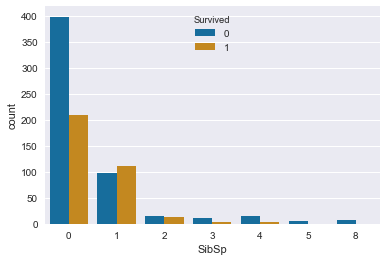

In [36]:
sns.countplot(x='SibSp', hue='Survived', data=train)
train.SibSp.value_counts()

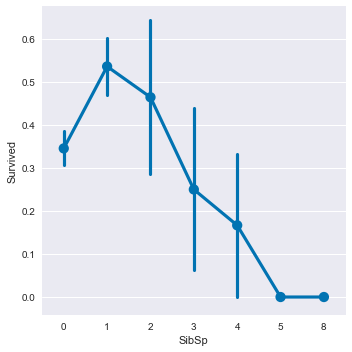

In [37]:
sns.catplot('SibSp', 'Survived', data=train, kind='point'); 

### Parch
Number of parents/children aboard the Titanic

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

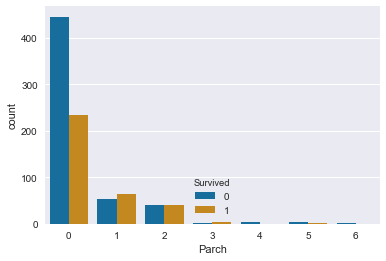

In [38]:
sns.countplot(x='Parch', hue='Survived', data=train)
train.Parch.value_counts()

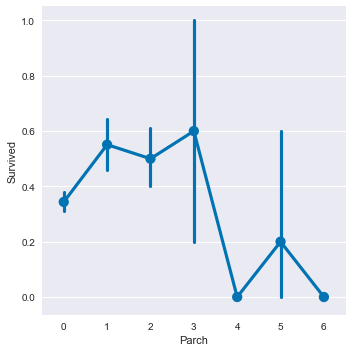

In [39]:
sns.catplot('Parch', 'Survived', data=train, kind='point'); 

### Fare

In [40]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

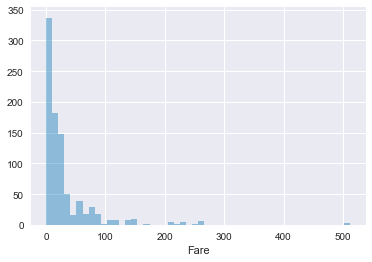

In [41]:
sns.distplot(train.Fare, kde=False)

Majority of tickets sold lie between 0 and 100, few outliers between 100 and 300 and maximal price of 512.



## Correlation between features

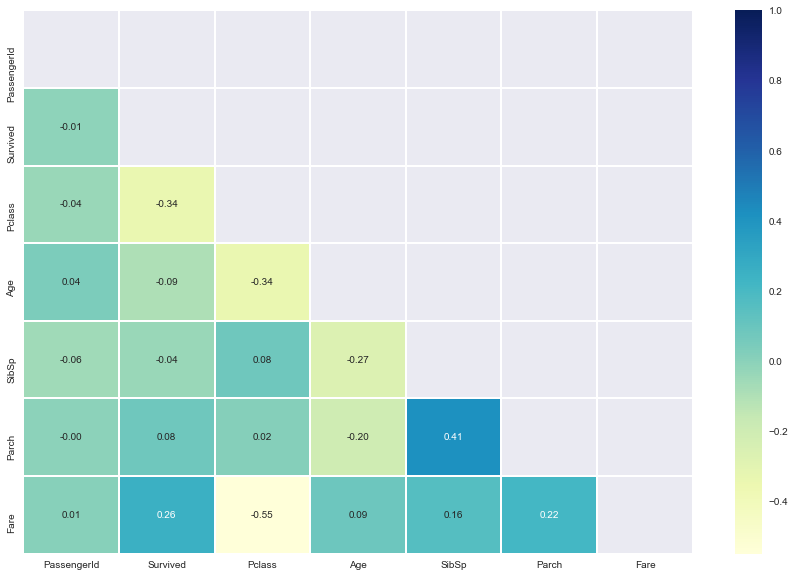

In [42]:
corr_matrix = train.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 mask = mask,
                 annot=True,
                 linewidths=1,
                 fmt='.2f',
                 cmap='YlGnBu'
                 )

Logically, there a relatively high correlation between SibSp and Parch since they both show how much family one has onboard. 

In addition, Pclass has a correlation of -.55 with Fare, which means that if you travel in a worse class (and the number of class gets higher), the price becomes lower or vice versa.

However, no correlations are so high that there is redundancy.

### Feature Engineering / Data Cleaning

In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


**Turning Age into a binned variable**

In [44]:
pd.cut(train.Age, bins=8).value_counts(sort=False)

(0.34, 10.368]       68
(10.368, 20.315]    115
(20.315, 30.263]    266
(30.263, 40.21]     292
(40.21, 50.158]      86
(50.158, 60.105]     42
(60.105, 70.052]     17
(70.052, 80.0]        5
Name: Age, dtype: int64

In [45]:
train['Age_bin'] = pd.cut(train.Age, bins=5)

In [46]:
train.Age_bin.isna().sum()

0

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,"(32.252, 48.168]"


**Turning Fare into a binned variable**

In [48]:
pd.cut(train.Fare, bins=5) # Does not make sense to cut the data like this since the majority of Fares are between 0-100

0      (-0.512, 102.466]
1      (-0.512, 102.466]
2      (-0.512, 102.466]
3      (-0.512, 102.466]
4      (-0.512, 102.466]
             ...        
886    (-0.512, 102.466]
887    (-0.512, 102.466]
888    (-0.512, 102.466]
889    (-0.512, 102.466]
890    (-0.512, 102.466]
Name: Fare, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.512, 102.466] < (102.466, 204.932] < (204.932, 307.398] < (307.398, 409.863] < (409.863, 512.329]]

In [49]:
pd.qcut(train.Fare, q=8).value_counts(sort=False)

(-0.001, 7.75]       140
(7.75, 7.91]          83
(7.91, 9.841]        111
(9.841, 14.454]      113
(14.454, 24.479]     110
(24.479, 31.0]       112
(31.0, 69.488]       110
(69.488, 512.329]    112
Name: Fare, dtype: int64

In [50]:
train['Fare_bin'] = pd.qcut(train.Fare, q=8)

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_bin,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"(16.336, 32.252]","(-0.001, 7.75]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"(32.252, 48.168]","(69.488, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(16.336, 32.252]","(7.91, 9.841]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,"(32.252, 48.168]","(31.0, 69.488]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,"(32.252, 48.168]","(7.91, 9.841]"


**Add Feature Family Size**

In [52]:
train['Family_Size']=0
train['Family_Size']=train['Parch']+train['SibSp']

### Converting Strings into Numeric

In [53]:
train['Sex'].replace(['male','female'],[0,1],inplace=True)
train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_bin,Fare_bin,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,"(16.336, 32.252]","(-0.001, 7.75]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,"(32.252, 48.168]","(69.488, 512.329]",1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.336, 32.252]","(7.91, 9.841]",0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,"(32.252, 48.168]","(31.0, 69.488]",1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,"(32.252, 48.168]","(7.91, 9.841]",0


In [55]:
df = 0
df = train.drop(['PassengerId', 'Name', 'Age_bin', 'Ticket', 'Fare_bin', 'Cabin'], axis = 1)

In [56]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Family_Size
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,1,1
2,1,3,1,26.0,0,0,7.9250,0,2,0
3,1,1,1,35.0,1,0,53.1000,0,1,1
4,0,3,0,35.0,0,0,8.0500,0,0,0
5,0,3,0,33.0,0,0,8.4583,2,0,0
6,0,1,0,54.0,0,0,51.8625,0,0,0
7,0,3,0,2.0,3,1,21.0750,0,3,4
8,1,3,1,27.0,0,2,11.1333,0,1,2
9,1,2,1,14.0,1,0,30.0708,1,1,1


In [57]:
X = df.drop(['Survived'], axis=1)
y = df.Survived

In [58]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Family_Size
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,1
2,3,1,26.0,0,0,7.9250,0,2,0
3,1,1,35.0,1,0,53.1000,0,1,1
4,3,0,35.0,0,0,8.0500,0,0,0


### Predictive Modelling

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)

### Feature Scaling
Now, there is a huge difference between the values of Age and Fare and the other features. 

This can create issues since many ML models will think these variables are of heigher weight/importance than the others,
while this is actually not the case.

Therefore, all variables will be scaled between 0 and 1. 

To do so, the possibilities are
* MinMax Scaler
* Robust Scaler
* Standard Scaler 

In this case, the Standard Scaler will be used.

In [60]:
from sklearn.preprocessing import StandardScaler
st_scale = StandardScaler()

## transforming "train_x"
X_train = st_scale.fit_transform(X_train)
## transforming "test_x"
X_test = st_scale.transform(X_test)

## transforming "The testset"
#test = st_scale.transform(test)

In [61]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8
0,0.819251,1.372075,0.462812,-0.464452,1.959264,-0.331679,0.997483,0.254023,0.648534
1,-0.380968,-0.728823,0.089500,-0.464452,-0.477410,-0.426405,-0.563414,-0.723623,-0.553956
2,-0.380968,-0.728823,0.089500,0.412710,0.740927,0.102620,0.997483,-0.723623,0.648534
3,0.819251,-0.728823,-0.731785,-0.464452,-0.477410,-0.555896,0.997483,-0.723623,-0.553956
4,0.819251,-0.728823,-0.657123,-0.464452,-0.477410,-0.491276,-0.563414,-0.723623,-0.553956
...,...,...,...,...,...,...,...,...,...
707,-1.581187,1.372075,0.686799,0.412710,0.740927,1.023857,0.997483,1.231670,0.648534
708,0.819251,1.372075,-0.806447,0.412710,-0.477410,-0.479216,-0.563414,1.231670,0.047289
709,0.819251,-0.728823,0.238825,-0.464452,-0.477410,-0.481629,2.558380,-0.723623,-0.553956
710,0.819251,1.372075,0.462812,0.412710,-0.477410,-0.288681,-0.563414,0.254023,0.047289


In [62]:
model = LogisticRegression(max_iter = 200)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8156424581005587

In [63]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.8435754189944135

In [64]:
model3 = KNeighborsClassifier()
model3.fit(X_train, y_train)
model3.score(X_test, y_test)

0.8044692737430168

#### Cross validated score
The above scores are not cross-validated.

We'll look at the average cross_validated score after 5 iterations of testing on a different part of the data.

In [65]:
np.mean(cross_val_score(model, X, y, cv= 5))

0.8058439520431863

In [66]:
np.mean(cross_val_score(model2, X, y, cv= 5))

0.80585022911305

In [67]:
np.mean(cross_val_score(model3, X, y, cv= 5))

0.7228359801644592

## Predicting Y

In [116]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [117]:
test['Initial'] = 0
for i in test:
    test['Initial']=train.Name.str.extract('([A-Za-z]+)\.')

In [118]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Miss
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mrs
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mr


In [119]:
test.Initial.value_counts()

Mr        228
Miss      101
Mrs        58
Master     23
Rev         3
Dr          3
Don         1
Mme         1
Name: Initial, dtype: int64

In [120]:
list(test.Initial.unique())

['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme']

In [121]:
test['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme'],
                         ['Mr', 'Mrs', 'Miss', 'Master', 'Mr', 'Mr', 'Mr', 'Other'], 
                         inplace = True)

In [122]:
test.groupby(['Initial'])['Age'].mean()

Initial
Master    30.476190
Miss      32.175000
Mr        29.790546
Mrs       28.847447
Other     29.000000
Name: Age, dtype: float64

In [123]:
test.Age.fillna(30, inplace = True)

In [124]:
test['Sex'].replace(['male','female'],[0,1],inplace=True)
test['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
test['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [125]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,0


In [131]:
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

KeyError: "['PassengerId' 'Name' 'Ticket' 'Cabin'] not found in axis"

In [132]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,3,0,34.5,0,0,7.8292,2,0
1,3,1,47.0,1,0,7.0000,0,1
2,2,0,62.0,0,0,9.6875,2,2
3,3,0,27.0,0,0,8.6625,0,1
4,3,1,22.0,1,1,12.2875,0,0


In [133]:
test.Fare.fillna(7.75, inplace = True)

In [134]:
test.Fare.isna().sum()

0

In [135]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
 7   Initial   418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [136]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,3,0,34.5,0,0,7.8292,2,0
1,3,1,47.0,1,0,7.0000,0,1
2,2,0,62.0,0,0,9.6875,2,2
3,3,0,27.0,0,0,8.6625,0,1
4,3,1,22.0,1,1,12.2875,0,0


In [137]:
test['Family_Size']=0
test['Family_Size']=test['Parch']+test['SibSp']

In [138]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Family_Size
0,3,0,34.5,0,0,7.8292,2,0,0
1,3,1,47.0,1,0,7.0000,0,1,1
2,2,0,62.0,0,0,9.6875,2,2,0
3,3,0,27.0,0,0,8.6625,0,1,0
4,3,1,22.0,1,1,12.2875,0,0,2


In [139]:
# transforming "The testset"
test2 = st_scale.fit_transform(test)

In [140]:
test3 = pd.DataFrame(test2)

In [141]:
test3.head()

,0,1,2,3,4,5,6,7,8
0,0.873482,-0.755929,0.339424,-0.499470,-0.400248,-0.497063,2.243165,-0.795021,-0.553443
1,0.873482,1.322876,1.329924,0.616992,-0.400248,-0.511926,-0.677841,0.202933,0.105643
2,-0.315819,-0.755929,2.518523,-0.499470,-0.400248,-0.463754,2.243165,1.200888,-0.553443
3,0.873482,-0.755929,-0.254876,-0.499470,-0.400248,-0.482127,-0.677841,0.202933,-0.553443
4,0.873482,1.322876,-0.651076,0.616992,0.619896,-0.417151,-0.677841,-0.795021,0.764728


In [142]:
y_preds = model.predict(test3)

In [143]:
y_preds2 = pd.DataFrame(y_preds)

In [144]:
len(submission)

418

In [145]:
len(y_preds2)

418

In [146]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [147]:
y_preds2.head()

,0
0,0
1,0
2,0
3,0
4,0


In [150]:
y_preds2.columns = ['Survived']

In [156]:
y_preds2['PassengerId'] = 0
y_preds2['PassengerId'] = originial_test['PassengerId']

In [164]:
y_preds2.columns = ['Survived', 'PassengerId']

In [165]:
y_preds2

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,0,896
...,...,...
413,0,1305
414,1,1306
415,0,1307
416,0,1308


In [168]:
y_preds2 = y_preds2[['PassengerId', 'Survived']]

In [169]:
y_preds2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [172]:
y_preds2.to_csv('Titanic_Submission1.csv', index=False)

In [175]:
submission2 = pd.read_csv('Titanic_Submission1.csv')
submission2.head(30)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,1
8,900,1
9,901,0
